
# SpaceX Falcon 9 — Quick EDA

This notebook gives you a quick, clean exploratory analysis of the processed SpaceX dataset generated by your script `build_dataset_past.py`.

**What you'll get:**
- Dataset shape, columns, head
- Descriptive statistics
- Nulls per column
- Five basic charts:
  1. Launches per year
  2. Success rate per year
  3. Total payload mass per year
  4. Top 10 customers
  5. Launches by pad (Top 10)

> **Note:** This notebook uses only `matplotlib` for plotting (no seaborn).


In [1]:

# --- Config ---
import os

# If you keep this notebook inside the `scripts/` folder, this relative path works.
# Adjust if needed.
CSV_PATH = os.path.join("..", "data", "processed", "spacex_launches_clean_past.csv")
print("CSV path:", os.path.abspath(CSV_PATH))


CSV path: c:\Users\erroc\OneDrive\Desktop\spacex-capstone-project\data\processed\spacex_launches_clean_past.csv


In [2]:

# --- Imports ---
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Matplotlib default settings (no custom styles/colors per instructions)
%matplotlib inline

pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 120)


In [3]:

# --- Load dataset ---
df = pd.read_csv(CSV_PATH)

print("Dataset shape:", df.shape)
print("\nColumns:")
print(df.columns.tolist())

print("\nHead:")
display(df.head())


Dataset shape: (179, 31)

Columns:
['id', 'flight_number', 'name', 'date_utc', 'date', 'year', 'month', 'day', 'quarter', 'weekday', 'is_success', 'rocket_id', 'rocket_name', 'rocket_type', 'stages', 'boosters', 'active', 'first_flight', 'launchpad_id', 'launchpad_name', 'full_name', 'region', 'locality', 'latitude', 'longitude', 'payload_total_mass_kg', 'payload_orbits', 'payload_customers', 'details', 'links.webcast', 'links.article']

Head:


,id,flight_number,name,date_utc,date,year,month,day,quarter,weekday,is_success,rocket_id,rocket_name,rocket_type,stages,boosters,active,first_flight,launchpad_id,launchpad_name,full_name,region,locality,latitude,longitude,payload_total_mass_kg,payload_orbits,payload_customers,details,links.webcast,links.article
0,5eb87cddffd86e000604b32f,6,Falcon 9 Test Flight,2010-06-04 18:45:00+00:00,2010-06-04,2010,6,4,2010Q2,Friday,True,5e9d0d95eda69973a809d1ec,Falcon 9,rocket,2,0,True,2010-06-04,5e9e4501f509094ba4566f84,CCSFS SLC 40,Cape Canaveral Space Force Station Space Launc...,Florida,Cape Canaveral,28.561857,-80.577366,NaN,LEO,SpaceX,NaN,https://www.youtube.com/watch?v=nxSxgBKlYws,http://www.spacex.com/news/2013/02/12/falcon-9...
1,5eb87cdeffd86e000604b330,7,COTS 1,2010-12-08 15:43:00+00:00,2010-12-08,2010,12,8,2010Q4,Wednesday,True,5e9d0d95eda69973a809d1ec,Falcon 9,rocket,2,0,True,2010-06-04,5e9e4501f509094ba4566f84,CCSFS SLC 40,Cape Canaveral Space Force Station Space Launc...,Florida,Cape Canaveral,28.561857,-80.577366,NaN,LEO,"NASA(COTS), NRO",NaN,https://www.youtube.com/watch?v=cdLITgWKe_0,https://en.wikipedia.org/wiki/SpaceX_COTS_Demo...
2,5eb87cdfffd86e000604b331,8,COTS 2,2012-05-22 07:44:00+00:00,2012-05-22,2012,5,22,2012Q2,Tuesday,True,5e9d0d95eda69973a809d1ec,Falcon 9,rocket,2,0,True,2010-06-04,5e9e4501f509094ba4566f84,CCSFS SLC 40,Cape Canaveral Space Force Station Space Launc...,Florida,Cape Canaveral,28.561857,-80.577366,525.0,LEO,NASA(COTS),"Launch was scrubbed on first attempt, second l...",https://www.youtube.com/watch?v=tpQzDbAY7yI,https://en.wikipedia.org/wiki/Dragon_C2%2B
3,5eb87ce0ffd86e000604b332,9,CRS-1,2012-10-08 00:35:00+00:00,2012-10-08,2012,10,8,2012Q4,Monday,True,5e9d0d95eda69973a809d1ec,Falcon 9,rocket,2,0,True,2010-06-04,5e9e4501f509094ba4566f84,CCSFS SLC 40,Cape Canaveral Space Force Station Space Launc...,Florida,Cape Canaveral,28.561857,-80.577366,800.0,"ISS, LEO","NASA (CRS), Orbcomm","CRS-1 successful, but the secondary payload wa...",https://www.youtube.com/watch?v=-Vk3hiV_zXU,https://www.nasa.gov/mission_pages/station/mai...
4,5eb87ce1ffd86e000604b333,10,CRS-2,2013-03-01 19:10:00+00:00,2013-03-01,2013,3,1,2013Q1,Friday,True,5e9d0d95eda69973a809d1ec,Falcon 9,rocket,2,0,True,2010-06-04,5e9e4501f509094ba4566f84,CCSFS SLC 40,Cape Canaveral Space Force Station Space Launc...,Florida,Cape Canaveral,28.561857,-80.577366,677.0,ISS,NASA (CRS),Last launch of the original Falcon 9 v1.0 laun...,https://www.youtube.com/watch?v=ik0ElKl5kW4,https://en.wikipedia.org/wiki/SpaceX_CRS-2


In [4]:

# --- Types & basic info ---
# Ensure correct dtypes for key columns
df["date_utc"] = pd.to_datetime(df["date_utc"], errors="coerce", utc=True)
df["year"] = pd.to_numeric(df["year"], errors="coerce", downcast="integer")
df["month"] = pd.to_numeric(df["month"], errors="coerce", downcast="integer")
df["day"] = pd.to_numeric(df["day"], errors="coerce", downcast="integer")

if "is_success" in df.columns:
    df["is_success"] = df["is_success"].astype(bool)

print(df.dtypes)


id                                    object
flight_number                          int64
name                                  object
date_utc                 datetime64[ns, UTC]
date                                  object
year                                   int16
month                                   int8
day                                     int8
quarter                               object
weekday                               object
is_success                              bool
rocket_id                             object
rocket_name                           object
rocket_type                           object
stages                                 int64
boosters                               int64
active                                  bool
first_flight                          object
launchpad_id                          object
launchpad_name                        object
full_name                             object
region                                object
locality  

In [5]:

# --- Descriptive statistics & nulls ---
print("\nNumeric describe:")
display(df.describe())

print("\nNulls per column:")
display(df.isnull().sum())



Numeric describe:


,flight_number,year,month,day,stages,boosters,latitude,longitude,payload_total_mass_kg
count,179.000000,179.000000,179.000000,179.000000,179.0,179.0,179.000000,179.000000,156.000000
mean,96.927374,2019.162011,6.234637,14.832402,2.0,0.0,29.524813,-86.847308,8174.715064
std,52.999367,2.748137,3.383822,8.759256,0.0,0.0,2.205540,14.579913,5518.046478
min,6.000000,2010.000000,1.000000,1.000000,2.0,0.0,28.561857,-120.610829,330.000000
25%,50.500000,2017.000000,3.500000,7.000000,2.0,0.0,28.561857,-80.603956,3075.000000
50%,98.000000,2020.000000,6.000000,15.000000,2.0,0.0,28.561857,-80.577366,6630.500000
75%,142.500000,2021.000000,9.000000,22.000000,2.0,0.0,28.608058,-80.577366,13260.000000
max,187.000000,2022.000000,12.000000,31.000000,2.0,0.0,34.632093,-80.577366,15712.000000



Nulls per column:


id                        0
flight_number             0
name                      0
date_utc                  0
date                      0
year                      0
month                     0
day                       0
quarter                   0
weekday                   0
is_success                0
rocket_id                 0
rocket_name               0
rocket_type               0
stages                    0
boosters                  0
active                    0
first_flight              0
launchpad_id              0
launchpad_name            0
full_name                 0
region                    0
locality                  0
latitude                  0
longitude                 0
payload_total_mass_kg    23
payload_orbits            0
payload_customers         0
details                  52
links.webcast             2
links.article            45
dtype: int64

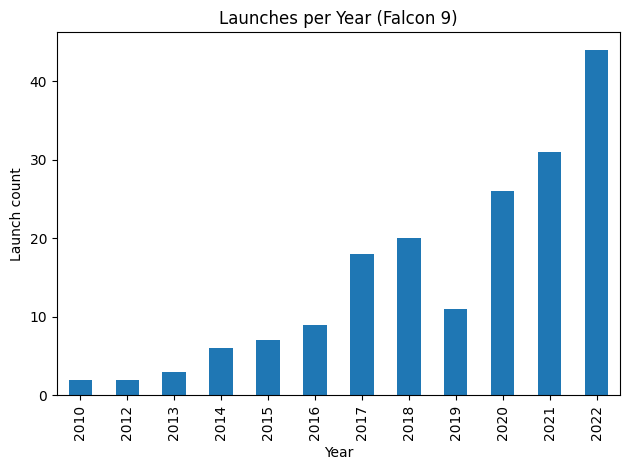

In [6]:

# 1) Launches per year
launches_per_year = df.groupby("year")["id"].count()

plt.figure()
launches_per_year.plot(kind="bar")
plt.title("Launches per Year (Falcon 9)")
plt.xlabel("Year"); plt.ylabel("Launch count")
plt.tight_layout()
plt.show()


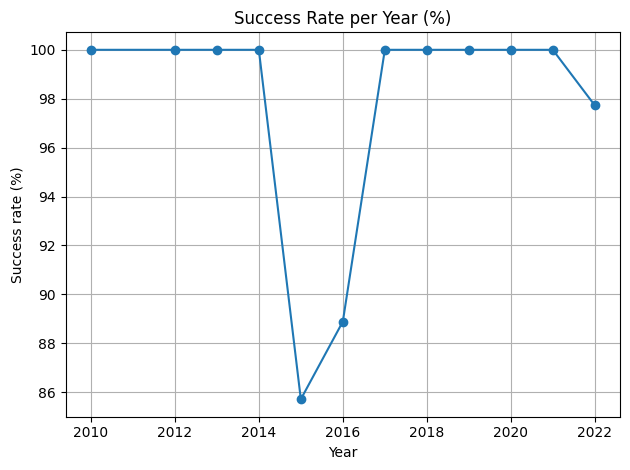

In [7]:

# 2) Success rate per year
if "is_success" in df.columns:
    success_rate = df.groupby("year")["is_success"].mean().mul(100)
    plt.figure()
    success_rate.plot(kind="line", marker="o")
    plt.title("Success Rate per Year (%)")
    plt.xlabel("Year"); plt.ylabel("Success rate (%)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Column 'is_success' not found; skipping success-rate plot.")


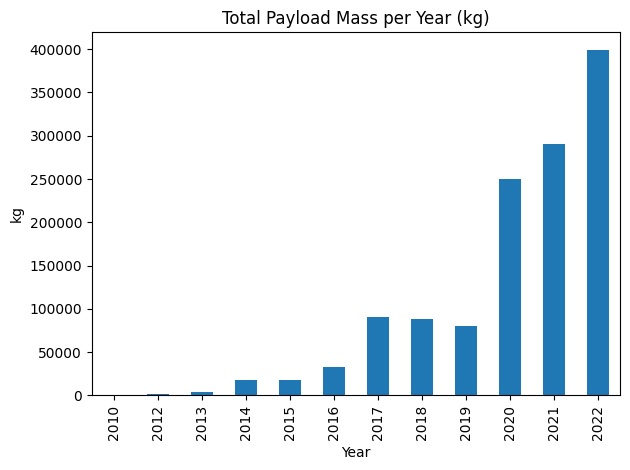

In [8]:

# 3) Total payload mass per year
df["payload_total_mass_kg"] = pd.to_numeric(df.get("payload_total_mass_kg"), errors="coerce")
mass_per_year = df.groupby("year")["payload_total_mass_kg"].sum(min_count=1)

plt.figure()
mass_per_year.plot(kind="bar")
plt.title("Total Payload Mass per Year (kg)")
plt.xlabel("Year"); plt.ylabel("kg")
plt.tight_layout()
plt.show()


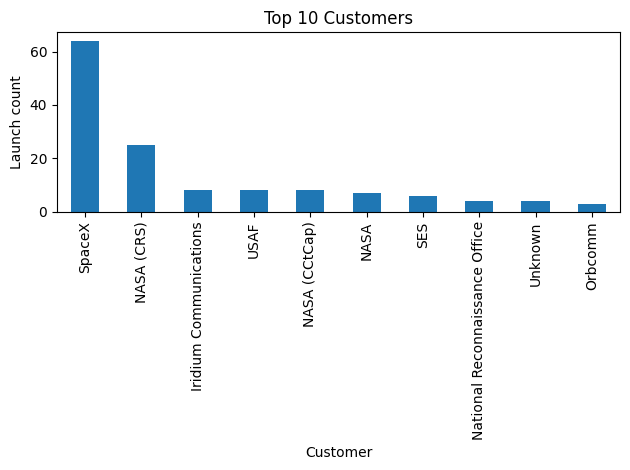

In [9]:

# 4) Top 10 customers
clients = (
    df.get("payload_customers", pd.Series(dtype=str))
      .fillna("Unknown")
      .astype(str)
      .str.split(",")
      .explode()
      .str.strip()
      .replace("", "Unknown")
)

top_clients = clients.value_counts().head(10)

plt.figure()
top_clients.plot(kind="bar")
plt.title("Top 10 Customers")
plt.xlabel("Customer"); plt.ylabel("Launch count")
plt.tight_layout()
plt.show()


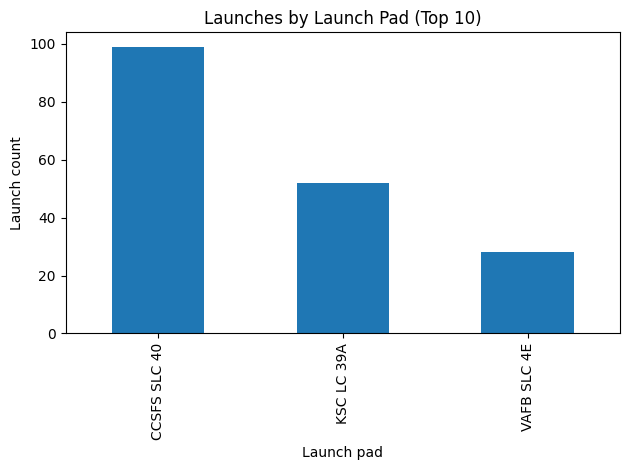

In [10]:

# 5) Launches by pad (Top 10)
pads = df.get("launchpad_name", pd.Series(dtype=str)).fillna("Unknown")
top_pads = pads.value_counts().head(10)

plt.figure()
top_pads.plot(kind="bar")
plt.title("Launches by Launch Pad (Top 10)")
plt.xlabel("Launch pad"); plt.ylabel("Launch count")
plt.tight_layout()
plt.show()


In [11]:

# --- KPIs ---
print("\n=== Quick KPIs ===")
print("Rows:", len(df))
print("Date range:", df["date_utc"].min(), "→", df["date_utc"].max())
if "is_success" in df.columns:
    print("Global success rate: {:.1f}%".format(df["is_success"].mean() * 100))
print("Total known payload mass (kg):", int(df["payload_total_mass_kg"].sum(skipna=True)))



=== Quick KPIs ===
Rows: 179
Date range: 2010-06-04 18:45:00+00:00 → 2022-10-05 16:00:00+00:00
Global success rate: 98.3%
Total known payload mass (kg): 1275255
